In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

2023-04-27 11:45:26.898016: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 11:45:27.101094: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 11:45:27.101122: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-27 11:45:27.148770: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-27 11:45:30.033345: W tensorflow/stream_executor/platform/de

In [7]:
train = pd.read_csv('data/train_cnn.csv')

In [8]:
train.shape

(42000, 785)

In [9]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = train.drop(['label'],axis=1)
y = train[['label']]

In [11]:
classes = train.label.unique()

In [12]:
print(X.shape,y.shape)

(42000, 784) (42000, 1)


In [13]:
# split training and validation data using sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42)

# reshape and normalize test data
X_train = X_train / 255.0
X_test = X_test / 255.0


print('trianing set: ', X_train.shape, y_train.shape)
print('validation set: ', X_test.shape, y_test.shape)
print('test set: ', X_test.shape, y_test.shape)

trianing set:  (33600, 784) (33600, 1)
validation set:  (8400, 784) (8400, 1)
test set:  (8400, 784) (8400, 1)


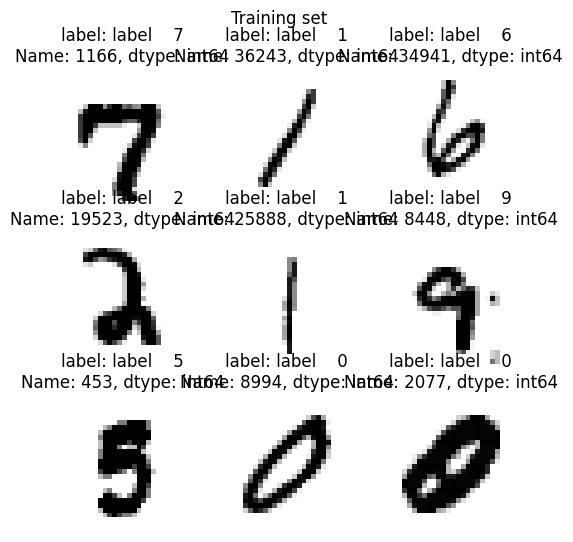

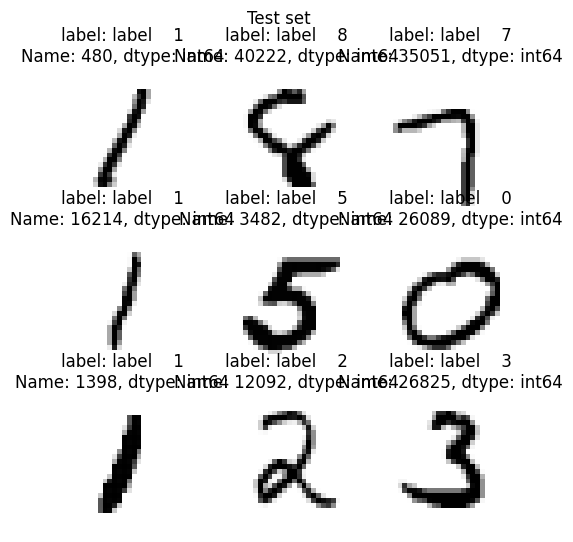

In [14]:

# select random samples from training dataset
train_samples = random.sample(range(0, len(X_train)), 9)
test_samples = random.sample(range(0, len(X_test)), 9)

X_train
plt.figure(figsize=(6, 6))
plt.suptitle('Training set')
for i in train_samples:
    plt.subplot(3, 3, train_samples.index(i)+1)
    plt.imshow(X_train.iloc[i,:].values.reshape(28,28), cmap='binary')
    plt.title(f'label: {y_train.iloc[i]}')
    plt.axis('off')
    
plt.figure(figsize=(6, 6))
plt.suptitle('Test set')
for i in test_samples:
    plt.subplot(3, 3, test_samples.index(i)+1)
    plt.imshow(X_test.iloc[i,:].values.reshape(28,28), cmap='binary')
    plt.title(f'label: {y_test.iloc[i]}')
    plt.axis('off')

In [15]:
model = tf.keras.models.Sequential([
       
        tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),

        

        tf.keras.layers.Conv2D(8, (3, 3), activation='relu'), # applies kernels to our data
        tf.keras.layers.MaxPooling2D(2, 2), # reduce dimension

        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(24, (3, 3), activation='relu'),


        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),

        tf.keras.layers.Dense(len(classes), activation=tf.nn.softmax) # generalized logistic regression
    ])
    

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

2023-04-27 11:46:13.119788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-27 11:46:13.119854: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-27 11:46:13.119887: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (UTILISA-U9ST353): /proc/driver/nvidia/version does not exist
2023-04-27 11:46:13.121203: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 24)          3

In [17]:
# train neural network and have it automatically stop on 95% accuracy
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=32, verbose=1)

Epoch 1/10
1050/1050 [==============================] - 24s 21ms/step - loss: 0.2799 - accuracy: 0.9153 - val_loss: 0.1048 - val_accuracy: 0.9687
Epoch 2/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0875 - accuracy: 0.9730 - val_loss: 0.0729 - val_accuracy: 0.9765
Epoch 3/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0628 - accuracy: 0.9796 - val_loss: 0.0920 - val_accuracy: 0.9711
Epoch 4/10
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0500 - accuracy: 0.9838 - val_loss: 0.0469 - val_accuracy: 0.9840
Epoch 5/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0417 - accuracy: 0.9872 - val_loss: 0.0517 - val_accuracy: 0.9843
Epoch 6/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0445 - val_accuracy: 0.9852
Epoch 7/10
1050/1050 [==============================] - 23s 21ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0549 -

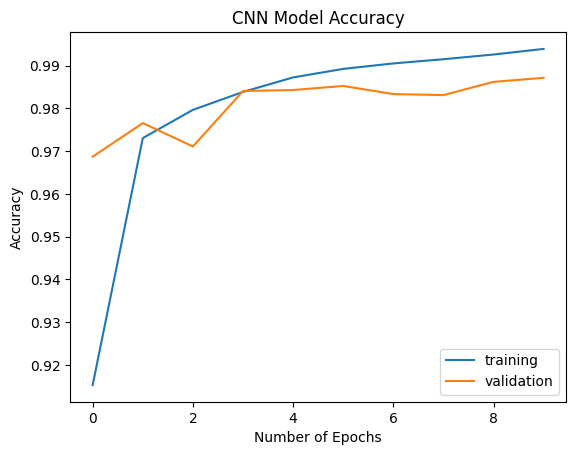

In [18]:
# Plot training vs validation accruacy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

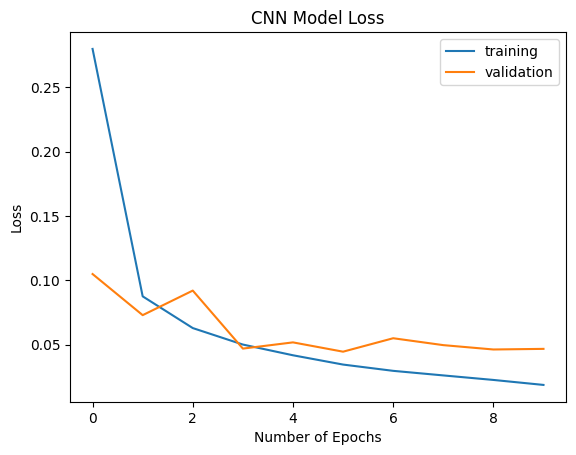

In [19]:
# Plot training vs validation losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [20]:
print(X_test.shape, y_test.shape)

(8400, 784) (8400, 1)


In [32]:
evaluate = model.evaluate(X_test, y_test)

# predict values for all data
predictions = model.predict(X_test)
print("predictions shape:", predictions.shape)

print(f'test loss   : {score[0]:4.4f} ')
print(f'test_accuracy: {score[1]:4.4f} ')

263/263 [==============================] - 2s 7ms/step
predictions shape: (8400, 10)
test loss   : 0.0466 
test_accuracy: 0.9871 
